In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# **DATA LOADING & PREPROCESSING**

In [3]:
train_csv = '/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv'
data = pd.read_csv(train_csv)

In [4]:
data.describe()

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
count,13636.000000,13636.000000,13636.000000,13636.000000,1.363600e+04,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000
mean,121.085289,38.624377,21785.990833,2.160311,1.623713e+09,0.014520,1.098269,0.543708,4.288721,153.127897
std,116.995633,29.672351,23883.189918,10.086424,5.444020e+06,0.137323,4.166487,3.265660,1.544839,140.986908
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6504.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,148.000000,63.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,510.000000,1.665756e+09,3.000000,80.000000,126.000000,5.000000,946.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


In [6]:
data.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

In [7]:
imputed_data = data.copy()

In [8]:
from sklearn.impute import SimpleImputer
sim = SimpleImputer(strategy = "most_frequent", missing_values=np.nan)
imputed_data[['Recipe_Review']] = sim.fit_transform(imputed_data[['Recipe_Review']])
imputed_data.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        0
dtype: int64

<Axes: >

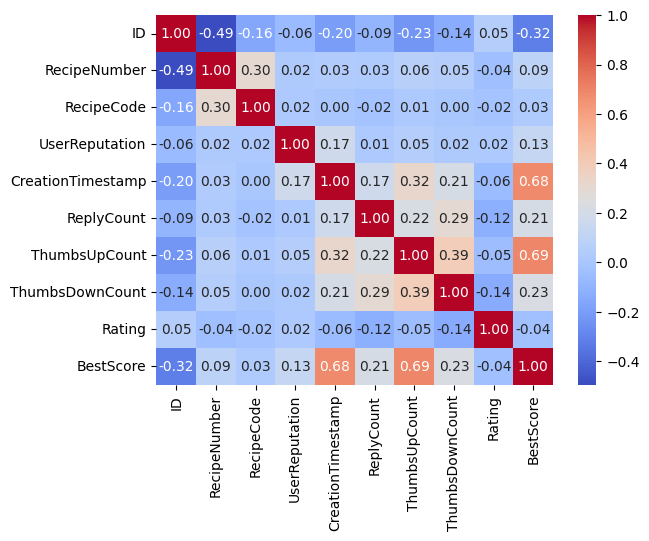

In [9]:
#Correlation Matrix
correlation_matrix = imputed_data.corr(numeric_only=True)
plt.figure()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")

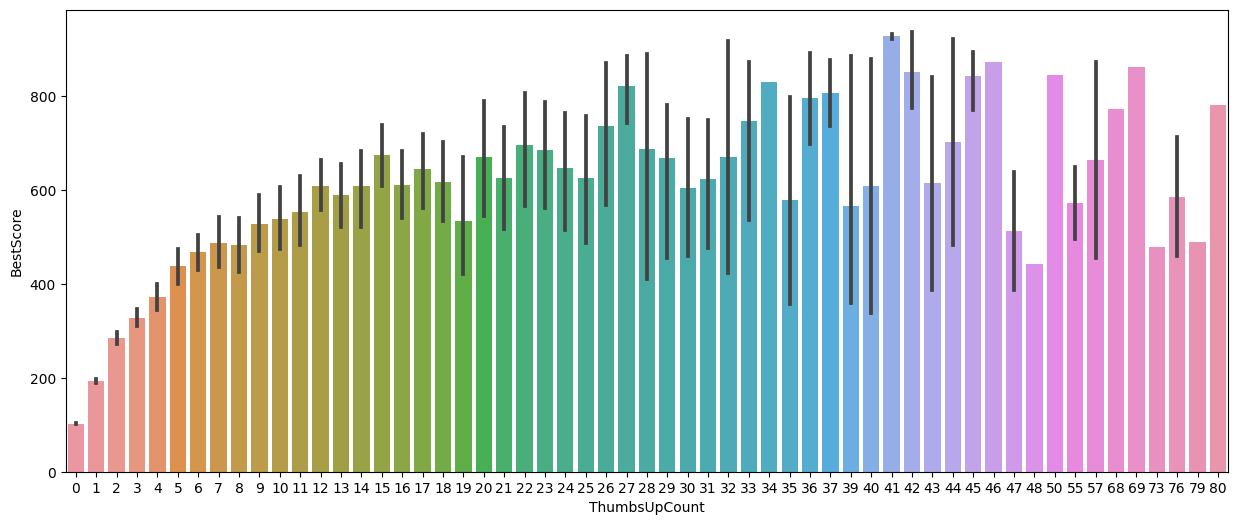

In [10]:
# ploting barplot for the columns having high correlation 
plt.figure(figsize=(15, 6))
sns.barplot(data=imputed_data,x="ThumbsUpCount", y="BestScore")
plt.show()

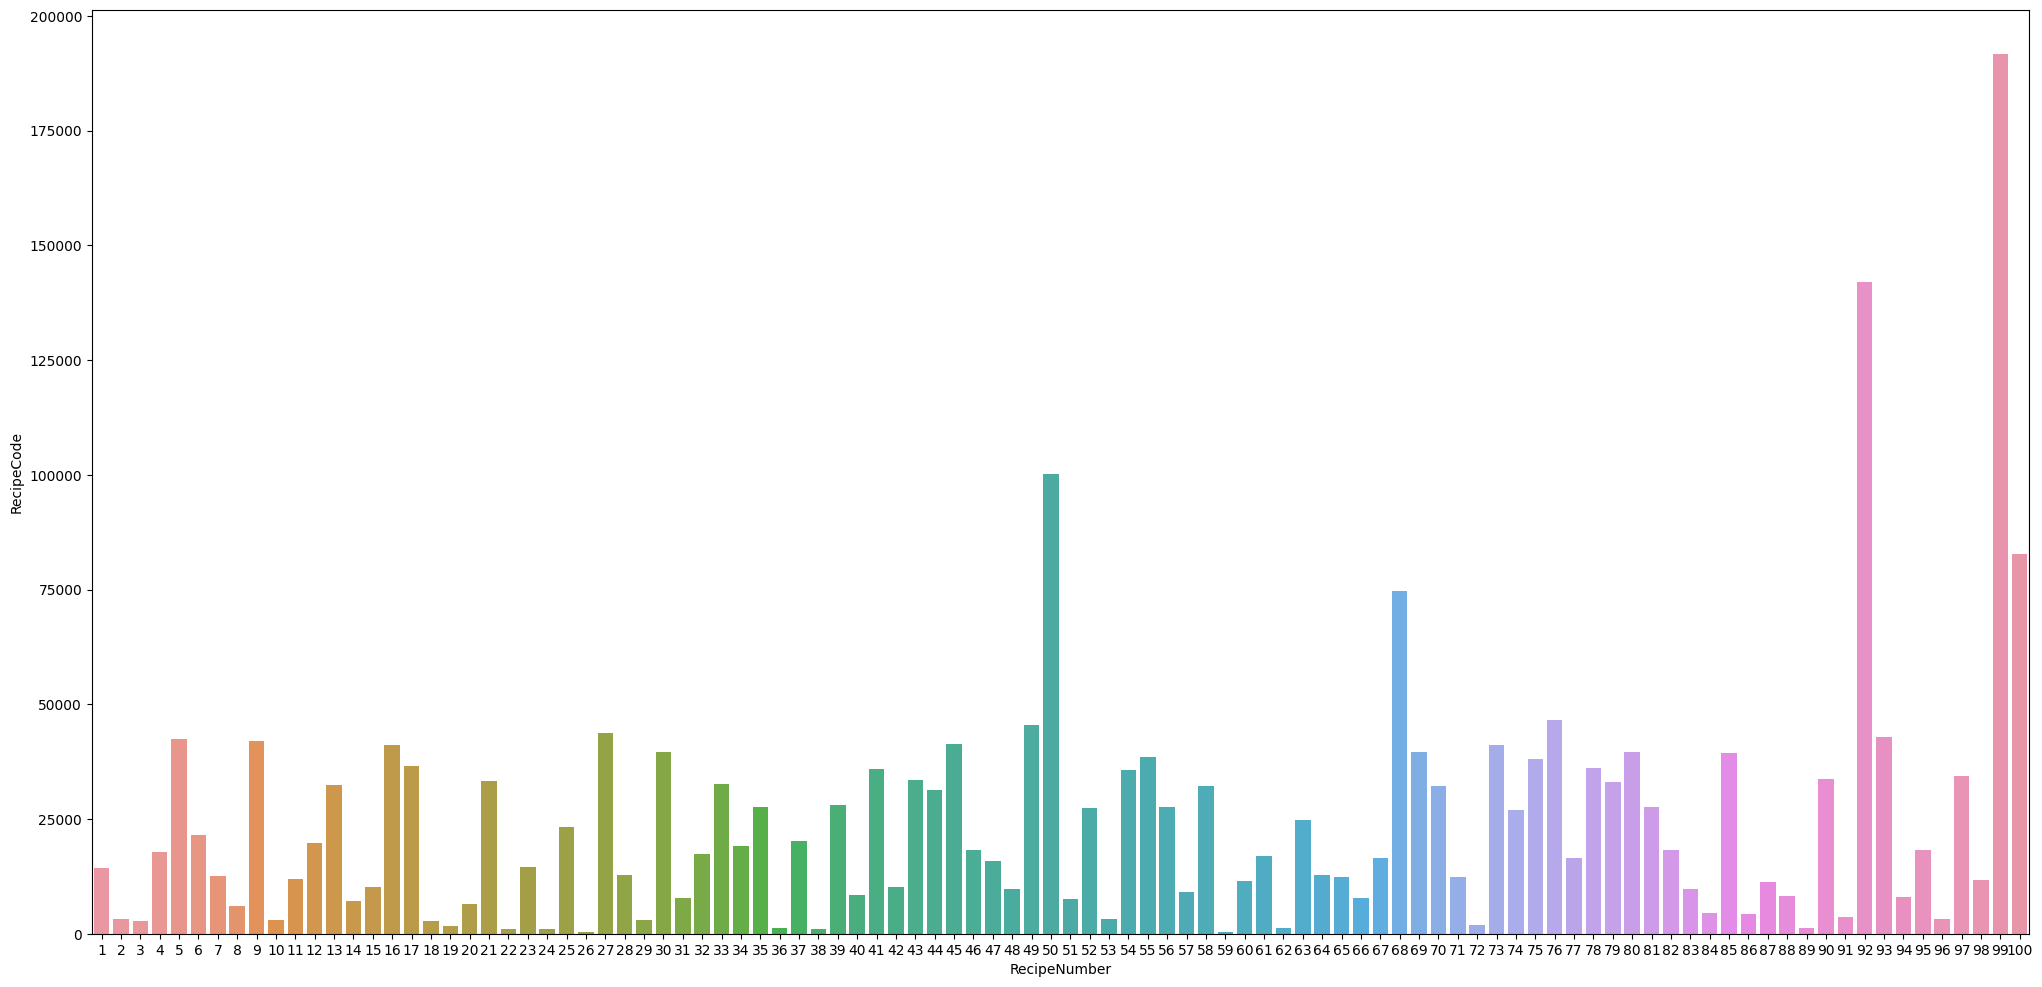

In [11]:
# ploting barplot for the columns having high correlation such as 
plt.figure(figsize=(25, 12))
sns.barplot(data=imputed_data,x="RecipeNumber", y="RecipeCode")
plt.show()


In [12]:
imputed_data.columns


Index(['ID', 'RecipeNumber', 'RecipeCode', 'RecipeName', 'CommentID', 'UserID',
       'UserName', 'UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore',
       'Recipe_Review'],
      dtype='object')

In [13]:
imputed_data.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rating', ylabel='Count'>

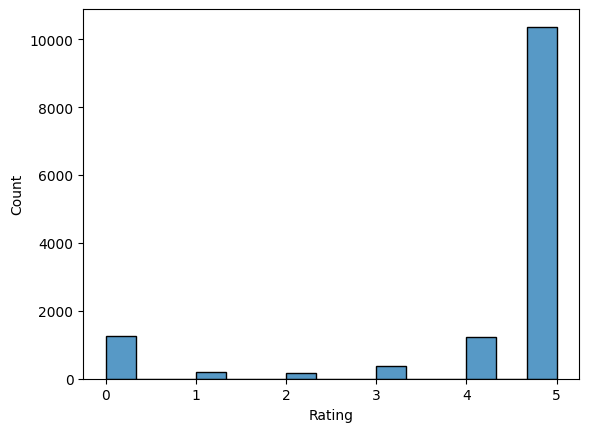

In [14]:
#histplot for Rating column
sns.histplot(
imputed_data,
x = imputed_data['Rating'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BestScore', ylabel='Count'>

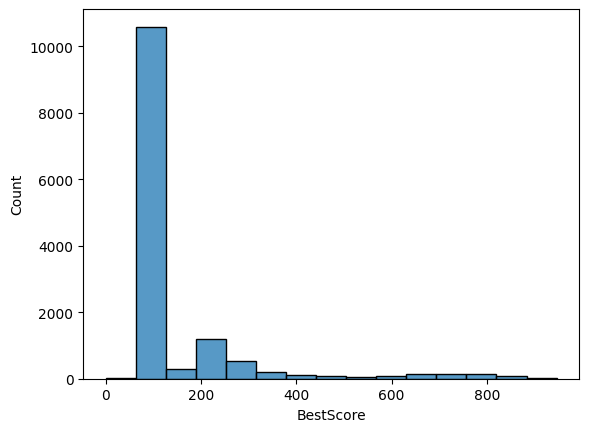

In [15]:
#histplot for BestScore
sns.histplot(
imputed_data,
x = imputed_data['BestScore'])

In [16]:
imputed_data.dtypes[imputed_data.dtypes=='object']

RecipeName       object
CommentID        object
UserID           object
UserName         object
Recipe_Review    object
dtype: object

In [17]:
imputed_data.dtypes[imputed_data.dtypes != 'object']

ID                   int64
RecipeNumber         int64
RecipeCode           int64
UserReputation       int64
CreationTimestamp    int64
ReplyCount           int64
ThumbsUpCount        int64
ThumbsDownCount      int64
Rating               int64
BestScore            int64
dtype: object

# RandomForestClassifier

In [18]:
from sklearn.model_selection import train_test_split ,GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# Splitting features and target variable
X = imputed_data.drop(columns=['Rating'])
y = imputed_data['Rating']

# Splitting the dataset into train and val sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing numerical features and categorical features
numeric_features = X.select_dtypes(include=['int64']).columns
numeric_transformer = StandardScaler()

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Column Transformer 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Pipeline with preprocessing and classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7595307917888563


> ****Hyper-parameters grid for RandomForestClassifier****

In [19]:
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model and printing the Best parameters
grid_search.fit(X_train, y_train)
print("Best parameters found:", grid_search.best_params_)

# Predictions
gs_pred = grid_search.predict(X_val)

# Evaluate the model
gs_accuracy = accuracy_score(y_val, gs_pred)
print("Accuracy:", gs_accuracy)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Accuracy: 0.7591642228739003


> **CROSS VALIDATION SCORE**

In [20]:
# cross validation 
cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=4)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Cross-validation scores: [0.76420975 0.76310964 0.76640997 0.76714338]
Mean CV accuracy: 0.7652181884855151


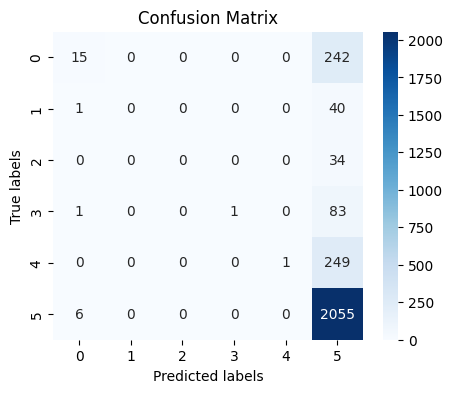

In [21]:
#confusion matrix
rf_conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# LogisticRegression Classifier

In [22]:
from sklearn.linear_model import LogisticRegression
pipeline2 = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier',LogisticRegression(max_iter=1000))
])


> **Hyper-parameters grid for LogisticRegression**

In [23]:

logit_param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']
}

# GridSearchCV
logit_grid_search = GridSearchCV(pipeline2, logit_param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model
logit_grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found:", logit_grid_search.best_params_)

# Predictions
lgs_pred = logit_grid_search.predict(X_val)

# Evaluate the model
lgs_accuracy = accuracy_score(y_val, lgs_pred)
print("Accuracy:", lgs_accuracy)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found: {'classifier__C': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Accuracy: 0.7628299120234604


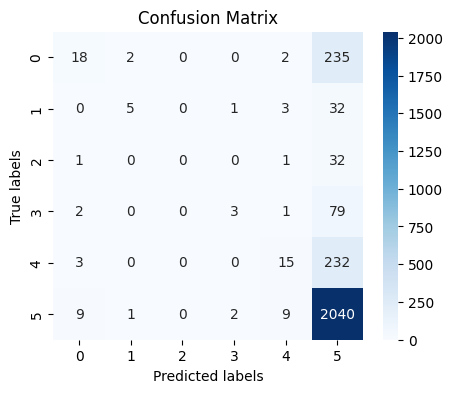

In [24]:
#Confusion matrix
lgs_conf_matrix = confusion_matrix(y_val, lgs_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(lgs_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [25]:
#cross validation
logit_cv_scores = cross_val_score(logit_grid_search.best_estimator_, X, y, cv=5)
print("Cross-validation scores:", logit_cv_scores)
print("Mean CV accuracy:", logit_cv_scores.mean())

Cross-validation scores: [0.76796188 0.7697103  0.76861019 0.76530986 0.76640997]
Mean CV accuracy: 0.767600442839983


# KNEIGHBORS CLASSIFIER

In [26]:
#importing Kneighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

In [27]:
#Using the same pipeline for the kneighbors classifier
pipeline3 = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier',KNeighborsClassifier())
])

pipeline3.fit(X_train,y_train)

knn_pred = pipeline3.predict(X_val) # model prediction

>  **HYPERPARAMETERS GRIDSEARCHCV FOR KNN**

In [28]:
#Grid parameters
knn_param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['brute'],
    'classifier__leaf_size': [10, 20, 30],
}

knn_grid_search = GridSearchCV(pipeline3, knn_param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model and printing the Best parameters
knn_grid_search.fit(X, y)


print("Best parameters found:", knn_grid_search.best_params_)

knn_gs_pred = knn_grid_search.predict(X_val)

# Evaluate the model
knn_gs_accuracy = accuracy_score(y_val, knn_gs_pred)
print("Accuracy:", knn_gs_accuracy)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found: {'classifier__algorithm': 'brute', 'classifier__leaf_size': 10, 'classifier__n_neighbors': 9, 'classifier__weights': 'distance'}
Accuracy: 1.0


In [29]:
#Cross valdidation 
knn_cv_scores = cross_val_score(knn_grid_search.best_estimator_, X, y, cv=10)
print("Cross-validation scores:", knn_cv_scores)
print("Mean CV accuracy:", knn_cv_scores.mean())

Cross-validation scores: [0.76319648 0.77052786 0.76686217 0.77346041 0.76539589 0.76979472
 0.75862069 0.77769626 0.76815847 0.76815847]
Mean CV accuracy: 0.7681871432474939


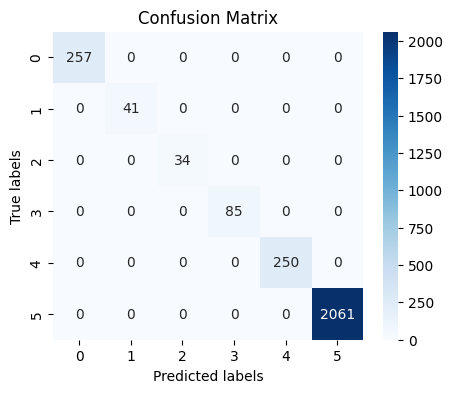

In [30]:
#Confusion matrix
knn_conf_matrix = confusion_matrix(y_val, knn_gs_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(knn_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# Model comparision using precision , recall , f1_score 

In [31]:
#Classification Report of RandomForestClassifie
from sklearn.metrics import classification_report
print(classification_report(y_val, gs_pred))

              precision    recall  f1-score   support

           0       0.62      0.06      0.11       257
           1       0.00      0.00      0.00        41
           2       0.00      0.00      0.00        34
           3       1.00      0.01      0.02        85
           4       0.00      0.00      0.00       250
           5       0.76      1.00      0.86      2061

    accuracy                           0.76      2728
   macro avg       0.40      0.18      0.17      2728
weighted avg       0.66      0.76      0.66      2728



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
#Classification Report of LogisticRegression Classifier
from sklearn.metrics import classification_report
print(classification_report(y_val, lgs_pred))

              precision    recall  f1-score   support

           0       0.55      0.07      0.12       257
           1       0.62      0.12      0.20        41
           2       0.00      0.00      0.00        34
           3       0.50      0.04      0.07        85
           4       0.48      0.06      0.11       250
           5       0.77      0.99      0.87      2061

    accuracy                           0.76      2728
   macro avg       0.49      0.21      0.23      2728
weighted avg       0.70      0.76      0.68      2728



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
#Classification Report of KNEIGHBORS CLASSIFIER
from sklearn.metrics import classification_report
print(classification_report(y_val, knn_gs_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        85
           4       1.00      1.00      1.00       250
           5       1.00      1.00      1.00      2061

    accuracy                           1.00      2728
   macro avg       1.00      1.00      1.00      2728
weighted avg       1.00      1.00      1.00      2728



# final submission using test data

In [34]:
#Data Loading and preprocessing
test = '/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv'
test_data = pd.read_csv(test)

In [35]:
test_data.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
BestScore            0
Recipe_Review        0
dtype: int64

In [36]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 4546 non-null   int64 
 1   RecipeNumber       4546 non-null   int64 
 2   RecipeCode         4546 non-null   int64 
 3   RecipeName         4546 non-null   object
 4   CommentID          4546 non-null   object
 5   UserID             4546 non-null   object
 6   UserName           4546 non-null   object
 7   UserReputation     4546 non-null   int64 
 8   CreationTimestamp  4546 non-null   int64 
 9   ReplyCount         4546 non-null   int64 
 10  ThumbsUpCount      4546 non-null   int64 
 11  ThumbsDownCount    4546 non-null   int64 
 12  BestScore          4546 non-null   int64 
 13  Recipe_Review      4546 non-null   object
dtypes: int64(9), object(5)
memory usage: 497.3+ KB


In [37]:
test_data_updated = test_data

In [38]:
#Feature Scaling 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
transformers = ([
    ('ohe1',OneHotEncoder(),['RecipeName','CommentID','UserID','UserName','Recipe_Review'])
    ])
ct = ColumnTransformer(transformers,verbose_feature_names_out=False)
test=ct.fit_transform(test_data_updated)
    

In [39]:
X_test = test_data_updated

# Predictions
knn_gs_pred_test = knn_grid_search.predict(X_test)

# Save predictions to a CSV file
submission = pd.DataFrame({"ID": range(1,4547), 
                           "Rating": knn_gs_pred_test }) 

submission.to_csv('submission.csv',index=False)


In [40]:
submission

,ID,Rating
0,1,4
1,2,5
2,3,5
3,4,5
4,5,5
...,...,...
4541,4542,5
4542,4543,5
4543,4544,5
4544,4545,5
